In [48]:
import os
import re
import uproot
import numpy as np
import matplotlib.pyplot as plt

### Merging

In [54]:
# fname  = os.path.expandvars("$LUSTRE/CProfiles/mu-/tuning/cprofiles_merged.root")
fname = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/CProfiles/cprofiles_merged.root")
f  = uproot.open(fname)
print(f.classnames())

# get momentum values
momenta = np.sort([float(re.findall(r'\d+(?:\.\d+)?', key)[0]) for key in f.keys() if re.match("g_\d+", key)])

{'g_550.0;1': 'TH2D', 'g_520.0;1': 'TH2D', 'g_480.0;1': 'TH2D', 'g_190.0;1': 'TH2D', 'g_250.0;1': 'TH2D', 'g_320.0;1': 'TH2D', 'g_490.0;1': 'TH2D', 'g_310.0;1': 'TH2D', 'g_180.0;1': 'TH2D', 'g_210.0;1': 'TH2D', 'g_540.0;1': 'TH2D', 'g_380.0;1': 'TH2D', 'g_230.0;1': 'TH2D', 'g_530.0;1': 'TH2D', 'g_170.0;1': 'TH2D', 'g_350.0;1': 'TH2D', 'g_450.0;1': 'TH2D', 'g_340.0;1': 'TH2D', 'g_440.0;1': 'TH2D', 'g_510.0;1': 'TH2D', 'g_330.0;1': 'TH2D', 'g_260.0;1': 'TH2D', 'g_290.0;1': 'TH2D', 'g_400.0;1': 'TH2D', 'g_270.0;1': 'TH2D', 'g_470.0;1': 'TH2D', 'g_220.0;1': 'TH2D', 'g_360.0;1': 'TH2D', 'g_160.0;1': 'TH2D', 'g_500.0;1': 'TH2D', 'g_280.0;1': 'TH2D', 'g_370.0;1': 'TH2D', 'g_420.0;1': 'TH2D', 'g_460.0;1': 'TH2D', 'g_390.0;1': 'TH2D', 'g_240.0;1': 'TH2D', 'g_300.0;1': 'TH2D', 'g_200.0;1': 'TH2D', 'g_410.0;1': 'TH2D', 'g_430.0;1': 'TH2D', 'g_590.0;1': 'TH2D', 'g_600.0;1': 'TH2D', 'g_560.0;1': 'TH2D', 'g_570.0;1': 'TH2D', 'g_670.0;1': 'TH2D', 'g_900.0;1': 'TH2D', 'g_690.0;1': 'TH2D', 'g_700.0;1':

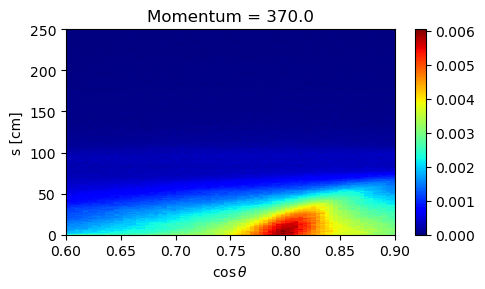

In [55]:
# choose random momentum
momentum = np.random.choice(momenta)
H, thbins, sbins  =  f[f"g_{momentum}"].to_numpy()

plt.figure(figsize=[5, 3])

plt.title(f"Momentum = {momentum}")
plt.pcolormesh(thbins, sbins/10, H.T, cmap="jet")
plt.xlim([0.6, 0.9])
plt.ylim([None, 250])
plt.xlabel(r"$\cos \theta$")
plt.ylabel("s [cm]")
plt.colorbar()

plt.tight_layout()

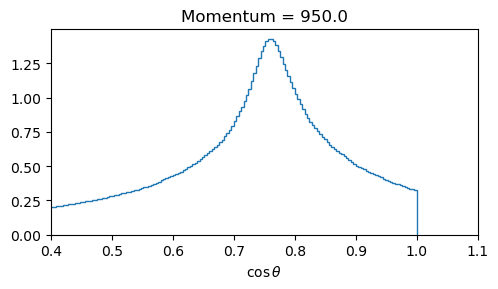

In [56]:
momentum = np.random.choice(momenta)
H, thbins, sbins  =  f[f"g_{momentum}"].to_numpy()

plt.figure(figsize=[5, 3])

plt.title(f"Momentum = {momentum}")
plt.stairs(H.T.sum(axis=0), thbins)
plt.xlim([0.4, None])
plt.xlabel(r"$\cos \theta$")

plt.tight_layout()

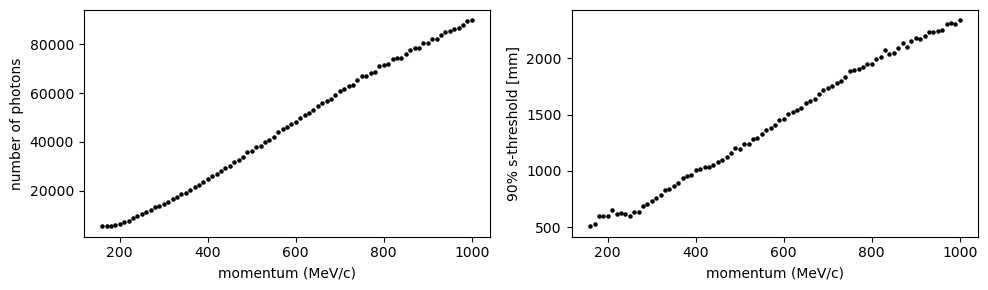

In [57]:
mom, nphotons    = f["gNphot"] .values()
mom, sthresholds = f["gsthr"]  .values()

plt.figure(figsize=[10, 3])

# nphotons
plt.subplot(121)
plt.scatter(mom, nphotons, s=5, c="k")
plt.xlabel("momentum (MeV/c)")
plt.ylabel("number of photons")

#sthreshols
plt.subplot(122)
plt.scatter(mom, sthresholds, s=5, c="k")
plt.xlabel("momentum (MeV/c)")
plt.ylabel("90% s-threshold [mm]")

plt.tight_layout()